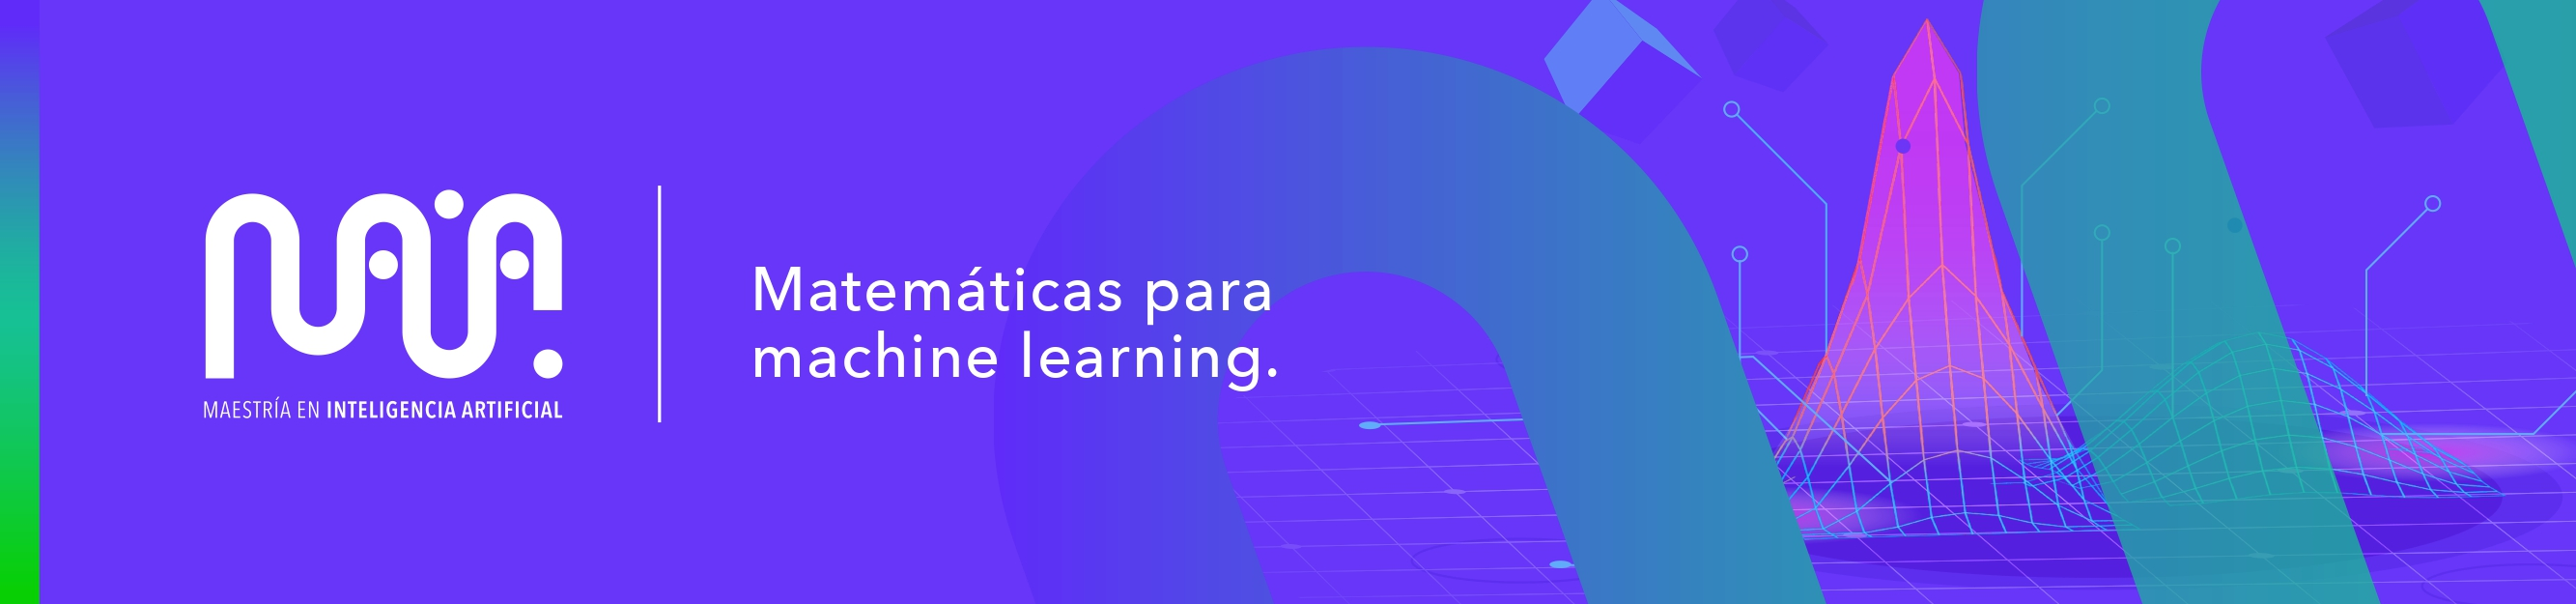

# **Laboratorio 4: Una introducción a Matplotlib Parte 2**


## **2. Superficies y curvas de nivel**

Durante el curso se tratarán temas de optimización donde será necesario el manejo de funciones multivariable. Muchos procesos optimización requieren un análisis gráficos para facilitar el entendimiento y verificar las soluciones. Entre estos análisis, están las superficies y curvas de nivel, las cuales son fundamentales para el curso. Para comenzar, es necesario comprender que estas funciones deben mapear desde $\mathbb{R^n}$ hasta $\mathbb{R}$. Es decir, deben tomar un vector de variables $[x_1, x_2, ..., x_n]^T$ y transformarlo en un escalar a través de operaciones matemáticas. Estas funciones de definen como:

\begin{align*}
f: \mathbb{R^n}  \rightarrow \mathbb{R}.
\end{align*}

Hace falta aclarar que para poder graficar una superficie, la función debe mapear desde $\mathbb{R^2}$ hasta $\mathbb{R}$, porque, de lo contrario, si $n>2$, no hay forma de graficar la función.

**2.1. Superficies**

 Para comenzar, se mostrará el proceso para graficar una superficie y los posibles ajustes y variantes que hay para esto. En principio, es necesario crear una función, en este caso, como ejemplo, se usará un paraboloide definido como:

\begin{align*}
f(x_1,x_2) = x_1^2 + x_2^2
\end{align*}

El proceso es similar a un gráfico simple, pero con algunos parámetros adicionales. Primero, veremos cómo cambia la función *subplots*, a la cual se le debe adicional el parámetro:

```
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
```

Lo que indica que se trata de una superficie. Ahora, se definen las variables como arreglos, igual que en el gráfico simple:



```
x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
```

El principal cambio es que la función no se puede definir con los arreglos creados anteriormente, debido a que es necesario crear una cuadrícula de puntos que serán proyectados en un eje vertical. La forma de hacer esto es la siguiente:

```
(X_1, X_2) = np.meshgrid(x_1, x_2)
```

Ahora si es posible definir la función:

```
f = X_1**2 + X_2**2
```

Ahora, para graficar la superficie se usa la función *plot_surface*, la cual recibe como parámetros las variables independientes en forma de cuadrícula y la función dependiente.

```
surf = ax.plot_surface(X_1, X_2, f)
```

Sin embargo, esta puede recibir más parámetros para poder ajustar el gráfico. Algunos de ellos son:

- *rcount, ccount:* Indica la cantidad de muestras que toma de cada variable independiente. El valor por defecto es 50,
- *cmap:* Agrega efectos de color (Leer documentación para ver las opciones)
- *facecolors:* Colorea un solo cuadrante de la cuadrícula.
- *shade:* Agrega sombra. (True por defecto).

Finalmente, es posible que el título del eje vertical no sea visible. Para solucionar eso, se incluye el siguiente comando:

```
ax.set_box_aspect(aspect=None, zoom=0.8)
```
Y luego se ajusta el tamaño de la figura.

El resultado del ejemplo sería el siguiente:


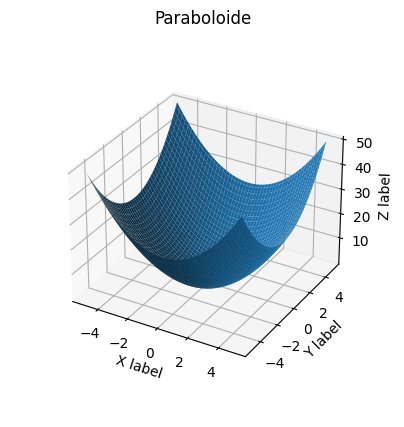

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"} ,  figsize = (5, 5))
x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
(X_1, X_2) = np.meshgrid(x_1, x_2)
f = X_1**2 + X_2**2

surf = ax.plot_surface(X_1, X_2, f)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.set(title = 'Paraboloide')

plt.show()

Igual que en los gráficos simples, existen variantes para graficar una superficie. La forma de incluirlas, es cambiando la función *plot_surface* por alguna de estas:

- *scatter:* Grafica los datos como puntos.
- *bar3d:* Grafica los datos en barras.
- *wireframe:* Cambia la superficie por un alambrado.
- *trisufr*: Modifica la cuadrícula por triángulos.
- *errorbar*: Añade barras de error en los puntos.


**2.2. Curvas de nivel**

En ocasiones, en anlálisis gráfico no es suficiente a través de la representación de la función como una superficie. En vez de esto, es resulta más conveniente representarla mediante curvas de nivel. Las curvas de nivel son el resultado de proyectar en un plano bidimensional un corte vertical del sólido generado por función, como se muestra en la siguiente imágen:

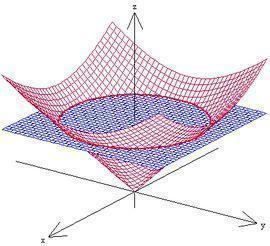

Note que, en el caso de un paraboloide,  el corte transversal a lo largo del eje vertical genera una circunferencia. En esencia, hay dos formas de representar estas curvas: a través de la curva generada, o mediante un mapa de calor. La forma de hacerlo es mediante las funciones *contour* y *contourf*, respectivamente, y su sintaxis es:

```
CS = ax.contour(X_1, X_2, f)
CS = ax.contourf(X_1, X_2, f)
```

Igual que todas las funciones anteriores, estas también se pueden ajustar mediante parámetros. Algunos de ellos son:

Para ambas funciones:

- *levels*: Indica el número de cortonos que se grafica.
- *alpha*: Indica la transparencia de los colores. (*aplpha* = 0: invisible, *alpha = 1: visible)
- *colors*: Indica el color de las curvas.
- *cmap*: Cambia el tipo de efecto de color.

Adicionalmente, cuando se trabaja con curvas de nivel, es posible usar otras funciones útiles como *clabel*, la cual permite agregar títulos a las curvas similar a una leyenda. La forma de usarla es la siguiente:

```
ax.clabel(CS)
```

Donde algunos argumentos de la función son:

- *fontsize*: Ajusta el tamaño de la letra.
- *colors*: Especifica el color de la letra.
- *rightside_up*: Cambia la orientación del texto de forma radial (True por defecto)

Finalmente, para el caso de la función *contourf*, es conveniente agregar una barra de color que indique cuantitativamente el rango de los colores. La forma de hacerlo es:

```
fig.colorbar(CS)
```

Usando el ejemplo del paraboloide, quedaría así:


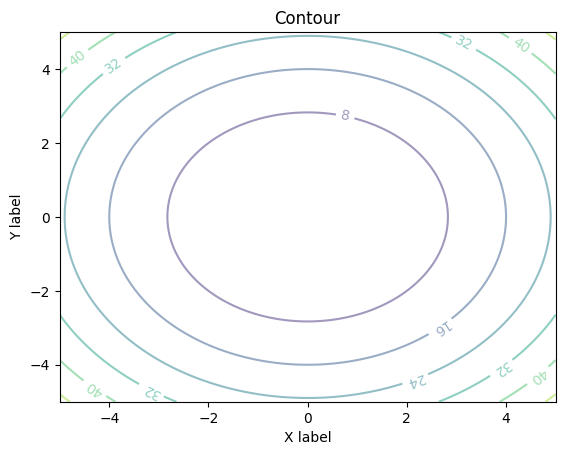

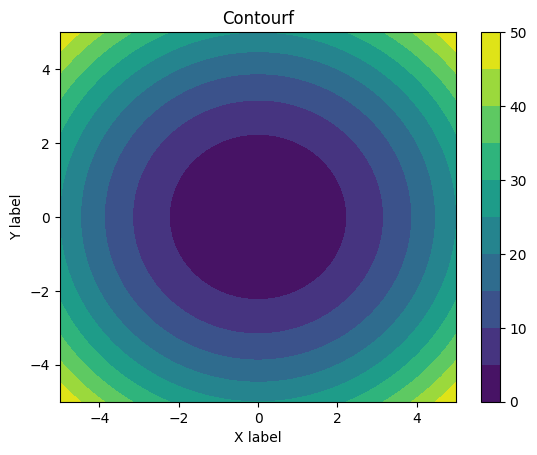

In [ ]:
fig, ax = plt.subplots()
x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
(X_1, X_2) = np.meshgrid(x_1, x_2)
f = X_1**2 + X_2**2

CS1 = ax.contour(X_1, X_2, f, alpha = 0.5)
ax.clabel(CS1, rightside_up = False)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set(title = 'Contour')
plt.show()


fig, ax = plt.subplots()
CS2 = ax.contourf(X_1, X_2, f, levels = 10)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set(title = 'Contourf')
fig.colorbar(CS2)
plt.show()

**2.3. Ejercicios**

A continuación, deben resolver los siguientes ejercicios realizando lo que se les pide. Las funciones a continuación son formas cuadráticas, que serán útiles en algunos métodos de optimización.

**2.3.1.** Grafique una superficie para las siguientes funciones cuadráticas en cuatro subplots en una misma figura (recuerde añadir labels para los tres ejes, títulos a los subplots y título general):

- $f_1(x_1, x_2) = x_1^2 - x_2^2$, (surface, agregue coloreado tipo *coolwarm*)
- $f_2(x_1, x_2) = - x_1^2 + x_2^2$, (scatter)
- $f_3(x_1, x_2) = x_1^2 + x_2^2 + x_1x_2$, (wireframe)
- $f_4(x_1, x_2) = x_1^2 + x_2^2 - x_1x_2$, (trisurf)

Donde $x_1 \in [-10,10], x_2 \in [-10,10]$

**2.3.2** Grafique en cuatro subplots en una misma figura las curvas de nivel con los respectivos labels para los ejes y las curvas, títulos y título general. Deben tener 6 niveles con una transparencia de 0.7. El label de las curvas de nivel debe ser de color negro.




**2.3.3.** Grafique en cuatro subplots en una misma figura el mapa de calor de las funciones anteriores. Incluya labels, títulos y título general, así como barra de color. Incluya 12 niveles.